# NEURAL NETWORK

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns #for visualization
sns.set()

In [2]:
df=pd.read_csv(r"C:\Users\Saurabha Srivastava\Downloads\datasetab75fb3\dataset.csv")
df.head(5)

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


## PREPROCESSING

In [3]:
df.shape

(5956842, 24)

In [4]:
#find null values
df.isnull().sum()

Index                          0
pH                        116054
Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Color                       5739
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Conductivity              163861
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Source                     88262
Water Temperature         168233
Air Temperature            29728
Month                      95668
Day                        99603
Time of Day               114519
Target                         0
dtype: int64

In [5]:
#Imputing null values-Replace with some other value
def impute_with_mode(df):
    return df.apply(lambda column: column.fillna(column.mode()[0]), axis=0)

# Applying the function to fill null values with mode for each column
df_imputed = impute_with_mode(df)

In [6]:
df_imputed

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,Stream,1.369793,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956837,5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,Faint Yellow,3.824532,0.541850,...,2.630130,9.608234e-03,545.990529,Well,21.436974,70.493951,February,8.0,8.0,1
5956838,5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,Near Colorless,1.181166,2.747241,...,3.555576,1.875424e-11,514.136530,Ground,19.064632,67.052475,September,8.0,6.0,1
5956839,5956839,8.145572,0.000005,7.112877,254.831175,3.150254e-56,0.656923,Colorless,1.769609,1.398686,...,3.127251,1.199405e+00,336.947289,Stream,5.863636,64.086020,January,16.0,11.0,1
5956840,5956840,8.273548,0.001236,10.182408,122.842038,4.226073e-33,0.903032,Light Yellow,0.366909,3.076229,...,2.762962,2.824411e+00,112.458644,Stream,28.034083,18.158372,March,29.0,13.0,1


In [7]:
df_imputed.isnull().sum()

Index                     0
pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Month                     0
Day                       0
Time of Day               0
Target                    0
dtype: int64

AxesSubplot(0.125,0.11;0.775x0.77)


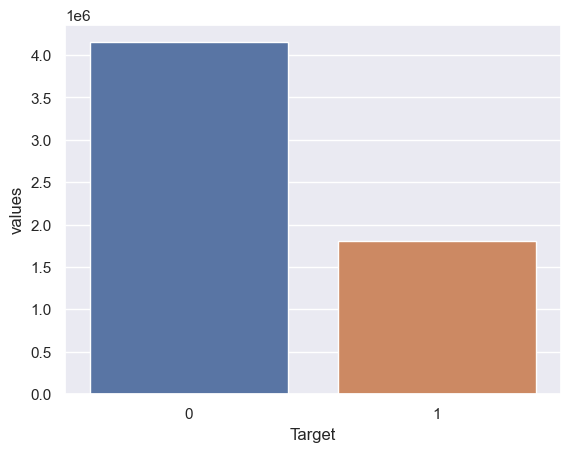

In [8]:
#check label imbalance -Binary classification task
#Label imbalance occurs when the number of data points in each class is
#not roughly equal, leading to a significant difference in class frequencies.

import matplotlib.pyplot as plt
import seaborn as sns

temp = df_imputed['Target'].value_counts()
temp_df = pd.DataFrame({'Target': temp.index, 'values': temp.values})
print(sns.barplot(x='Target', y='values', data=temp_df))

In [9]:
df_imputed.dtypes

Index                       int64
pH                        float64
Iron                      float64
Nitrate                   float64
Chloride                  float64
Lead                      float64
Zinc                      float64
Color                      object
Turbidity                 float64
Fluoride                  float64
Copper                    float64
Odor                      float64
Sulfate                   float64
Conductivity              float64
Chlorine                  float64
Manganese                 float64
Total Dissolved Solids    float64
Source                     object
Water Temperature         float64
Air Temperature           float64
Month                      object
Day                       float64
Time of Day               float64
Target                      int64
dtype: object

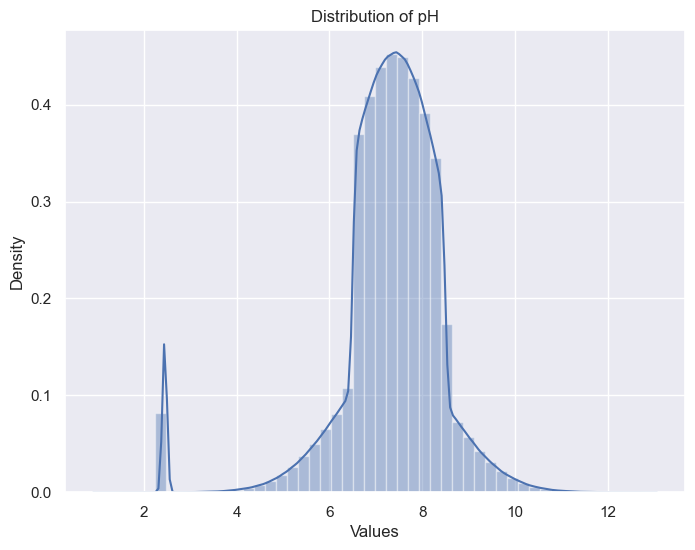

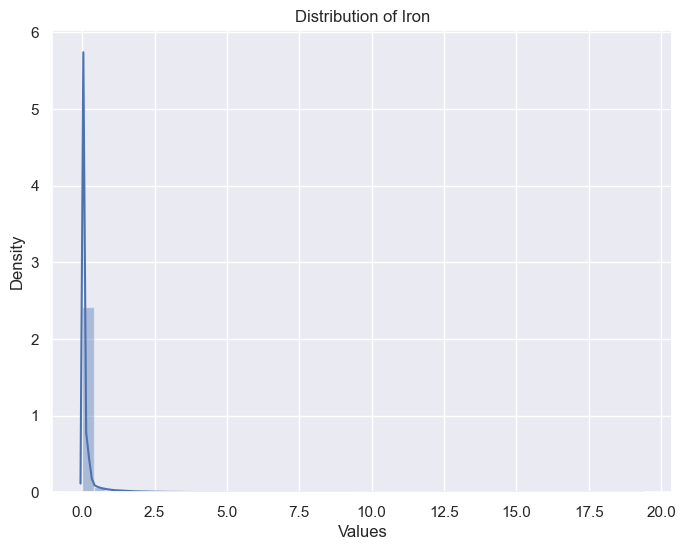

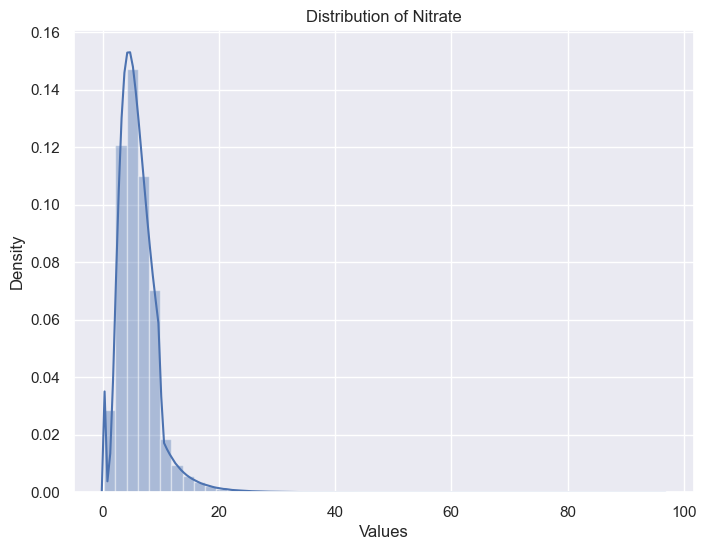

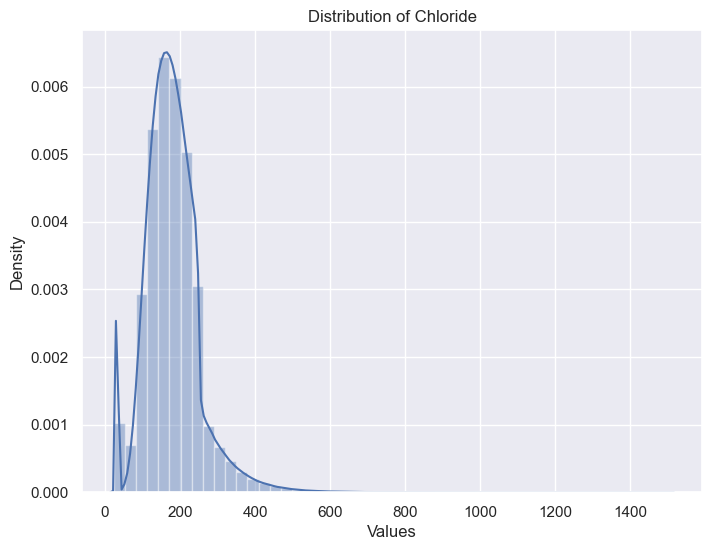

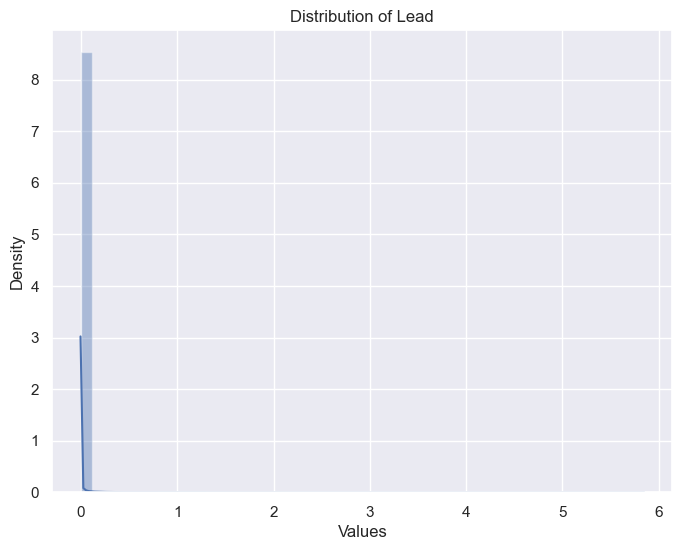

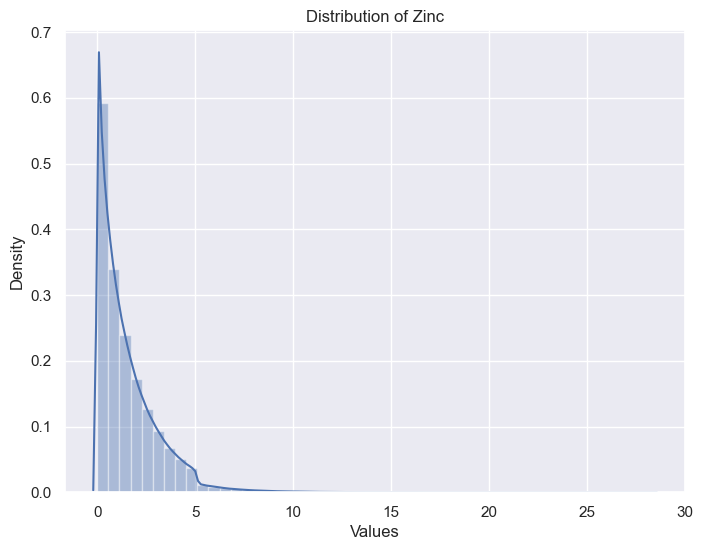

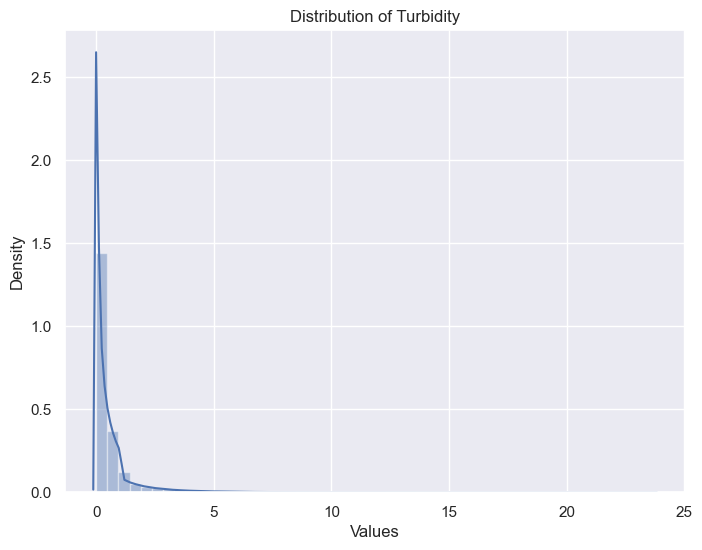

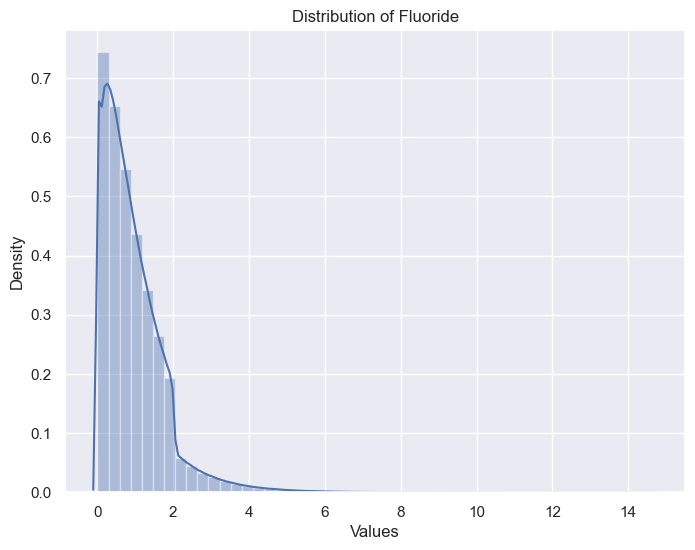

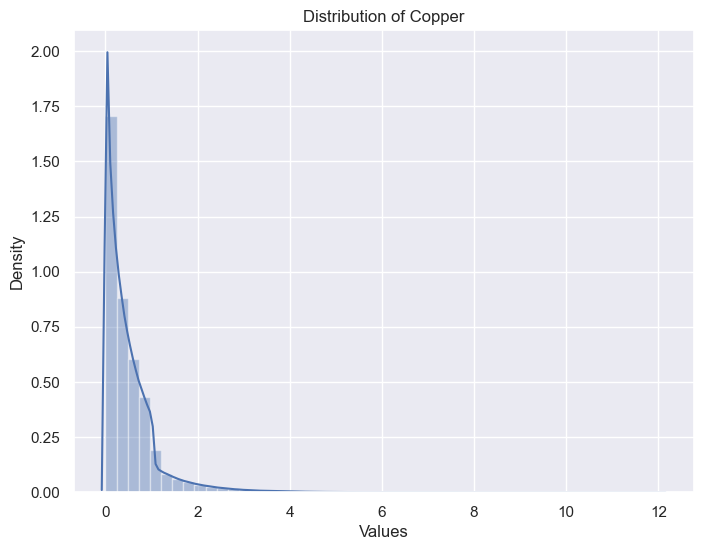

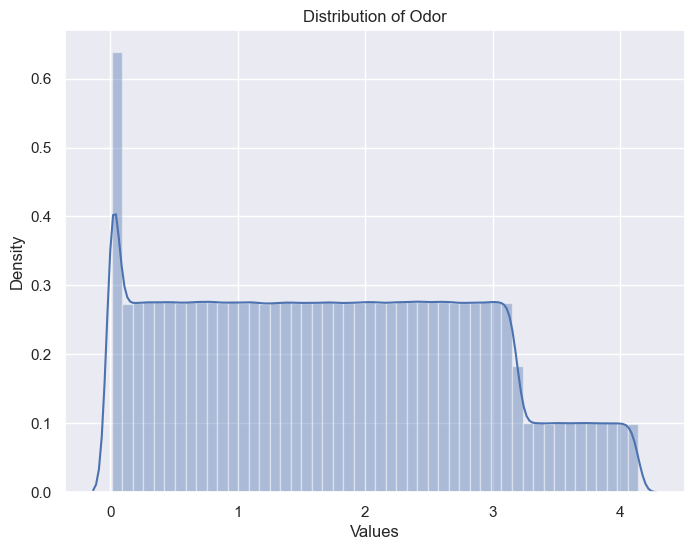

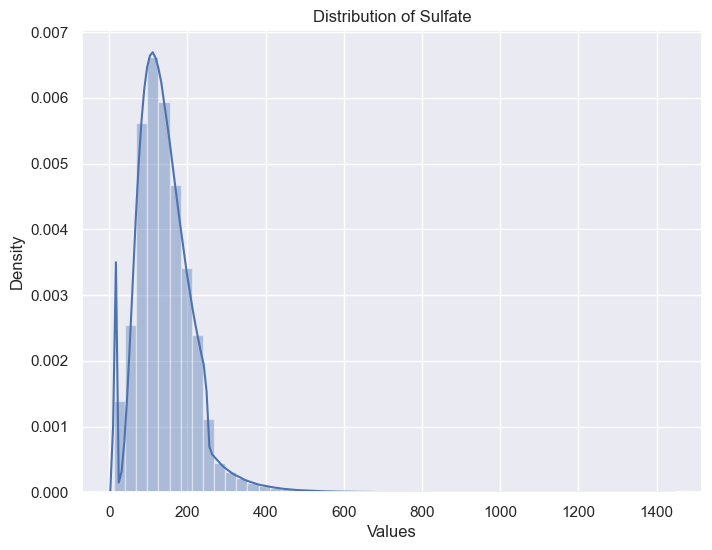

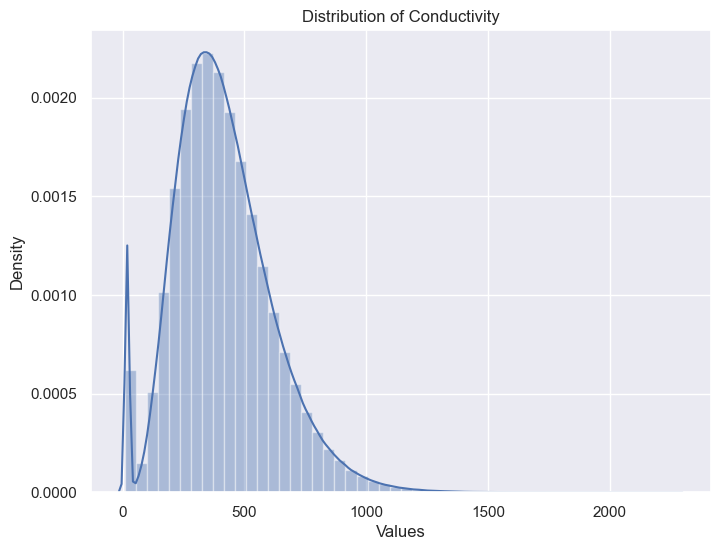

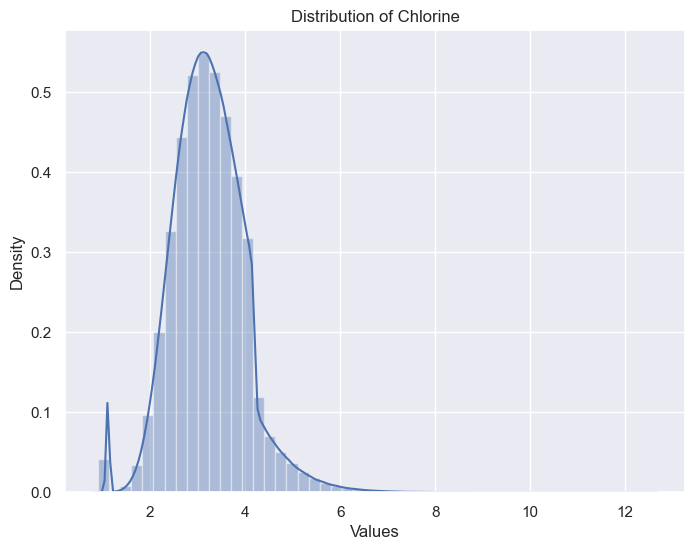

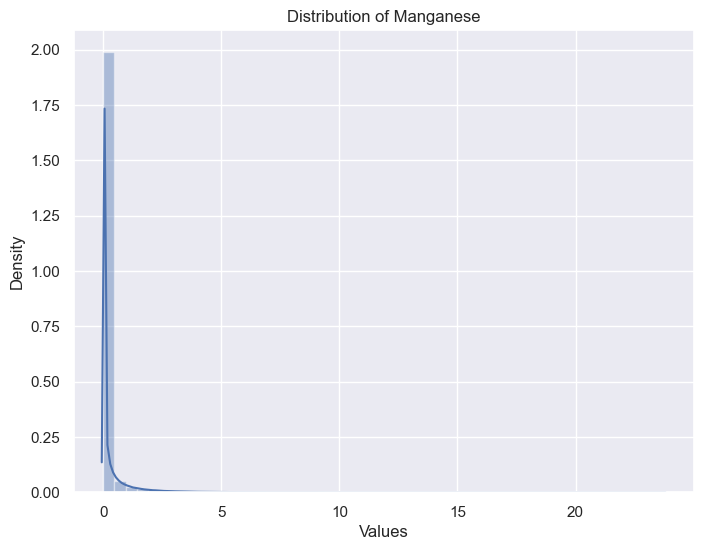

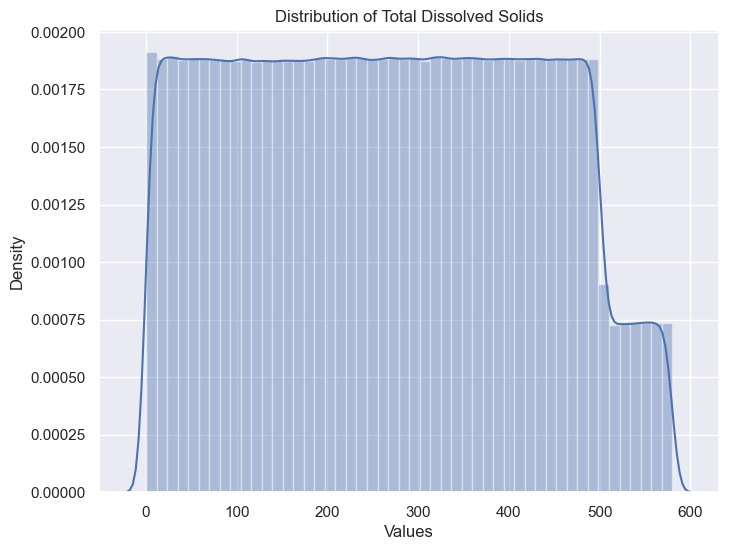

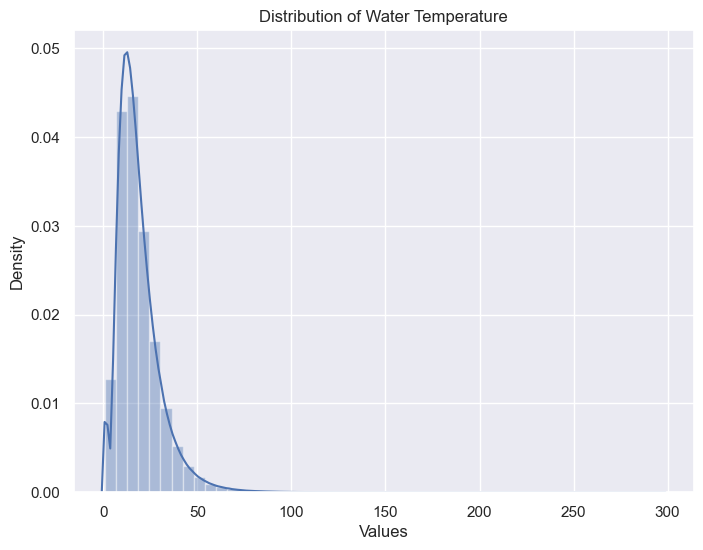

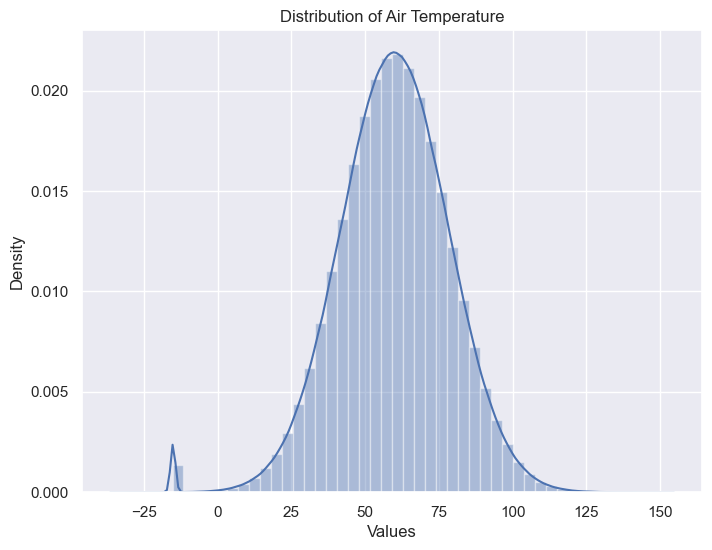

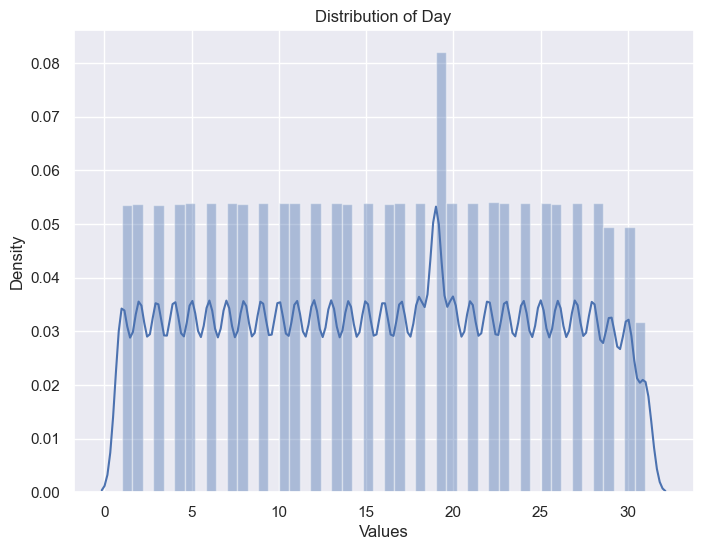

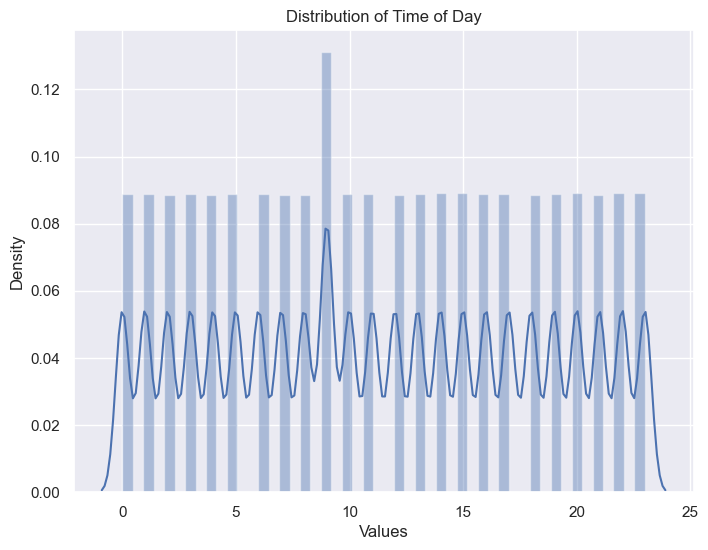

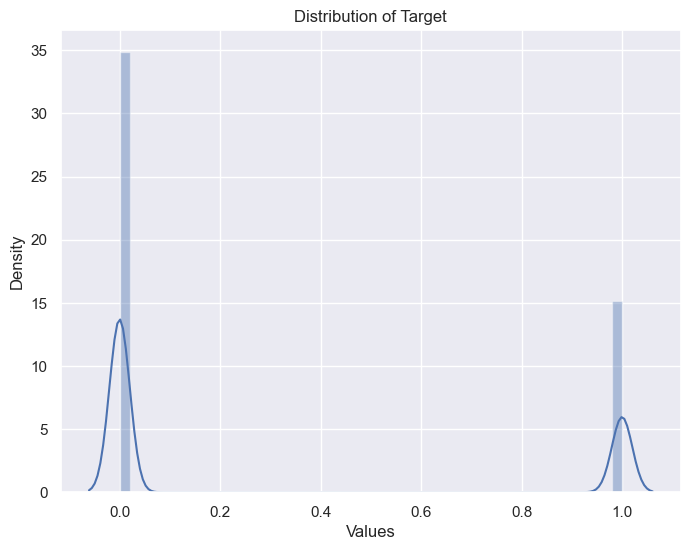

In [10]:
#Find the distribution of data

numerical_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns[1:]
for column in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    
    # Plot the distribution for the current column
    sns.distplot(df_imputed[column])
    
    # Add labels and title
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'Distribution of {column}')
    
    # Show the plot
    plt.show()

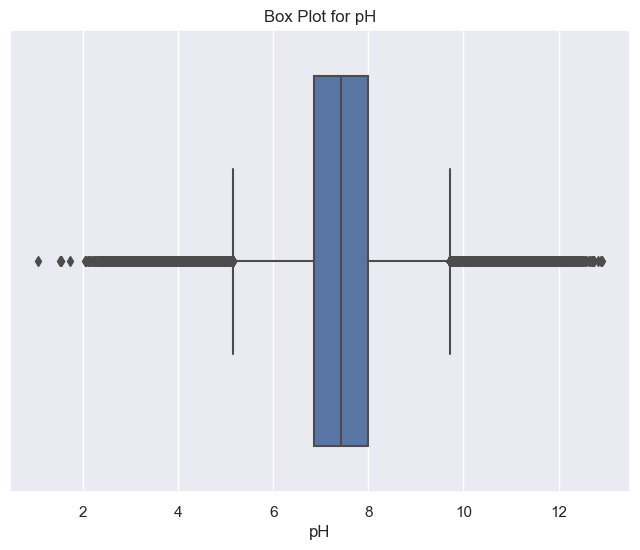

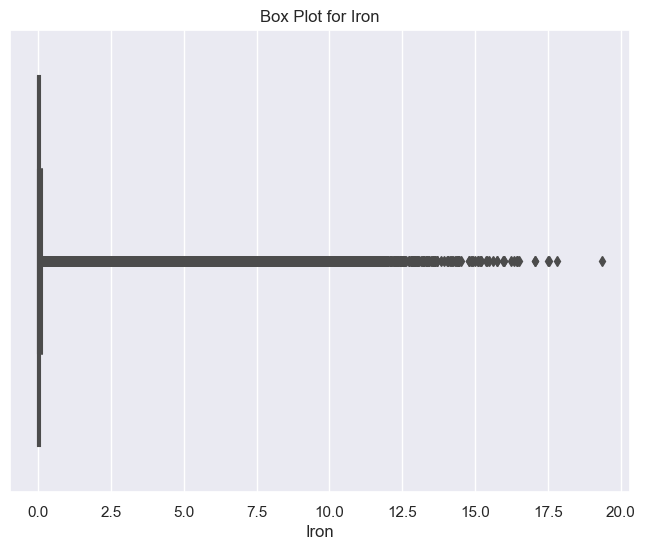

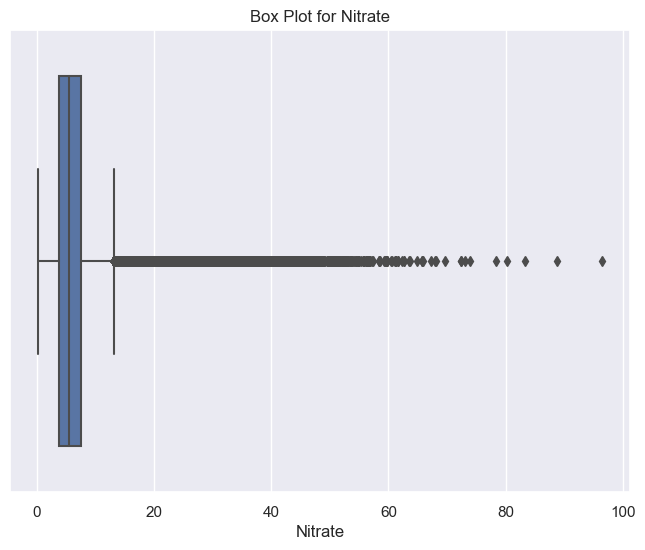

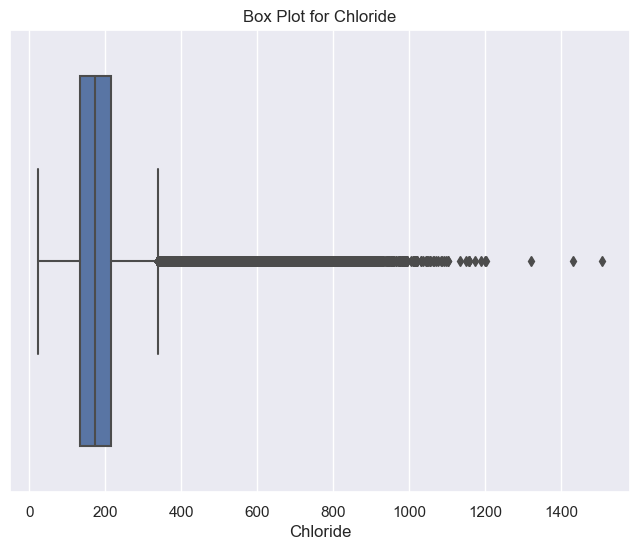

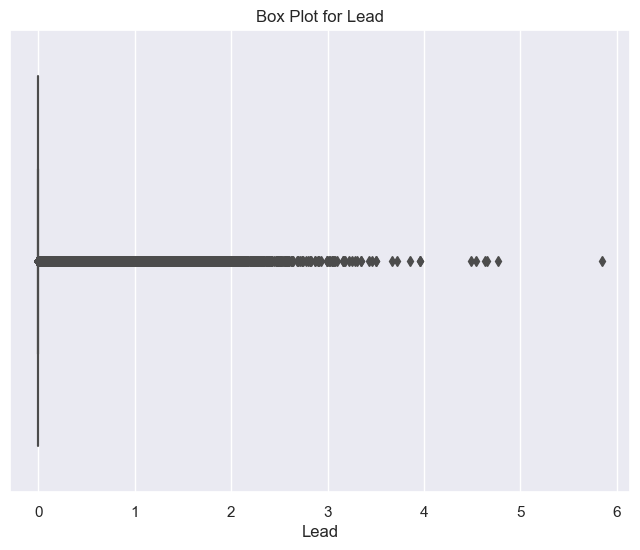

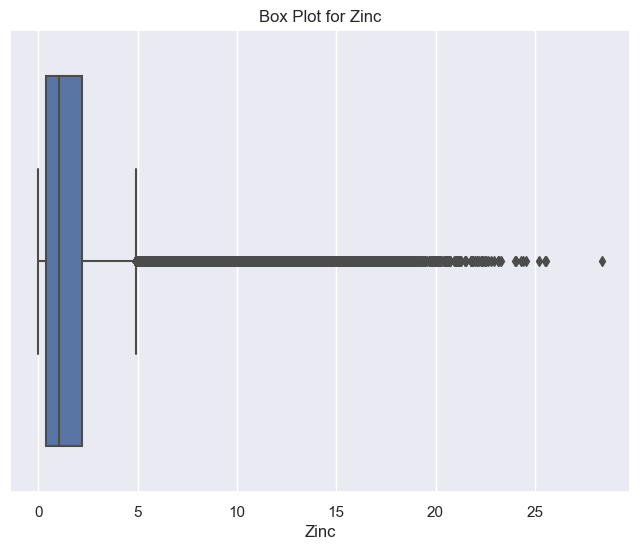

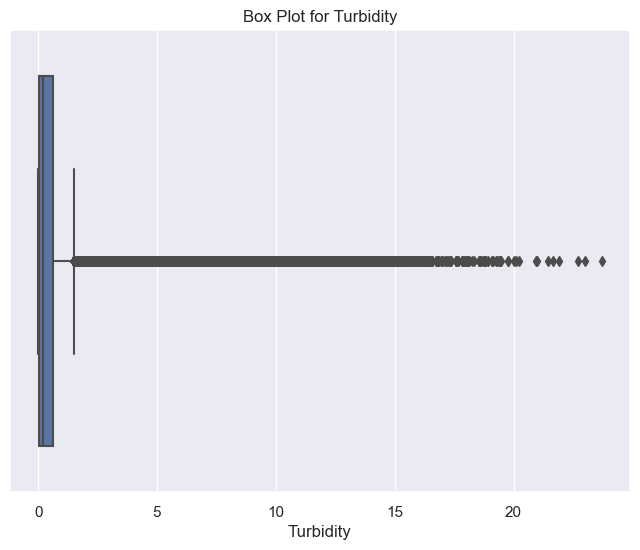

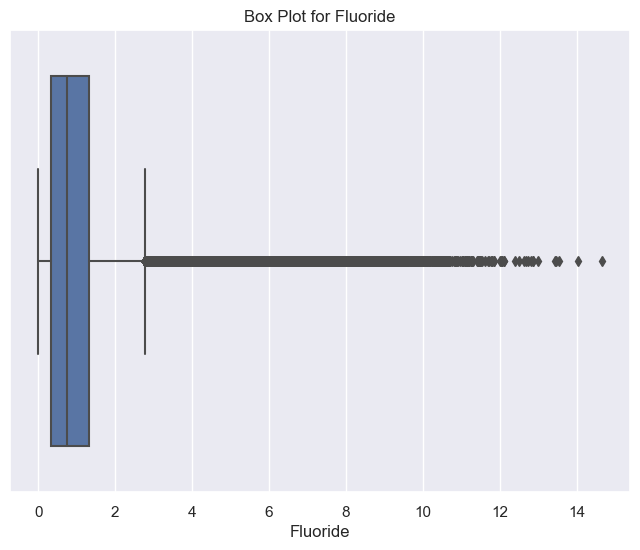

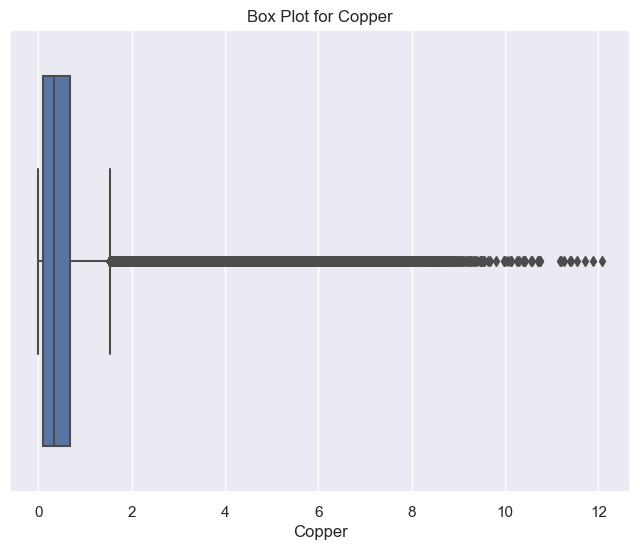

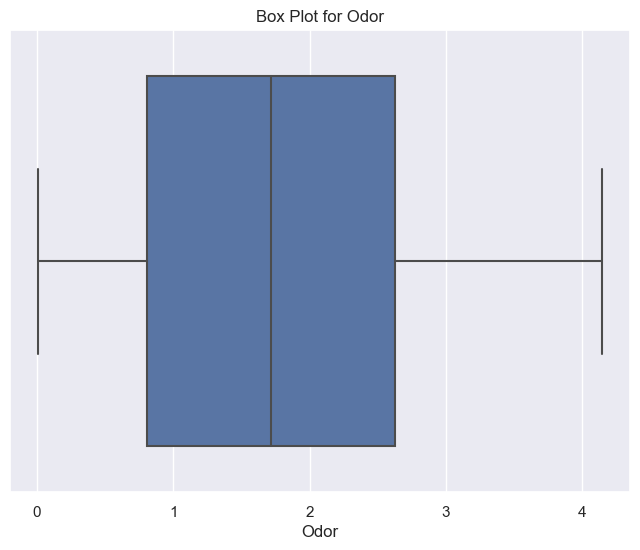

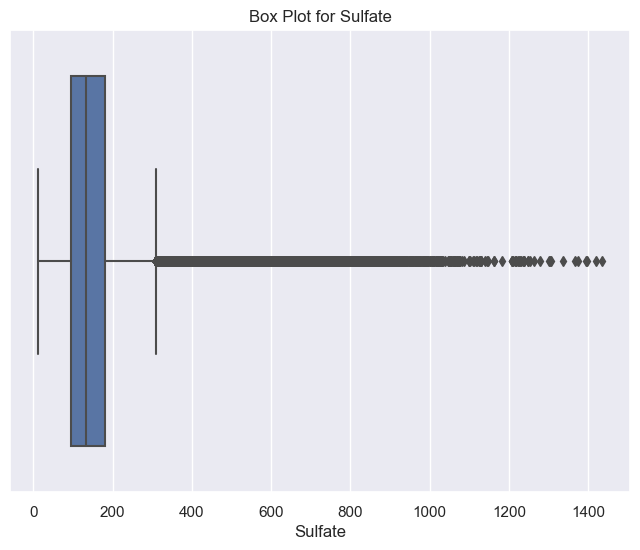

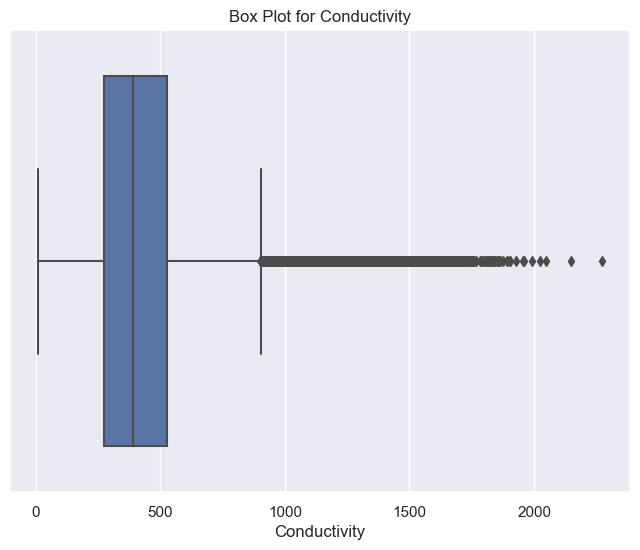

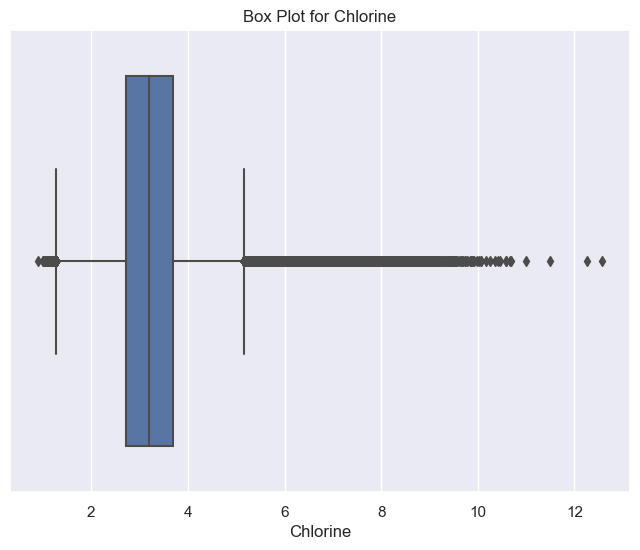

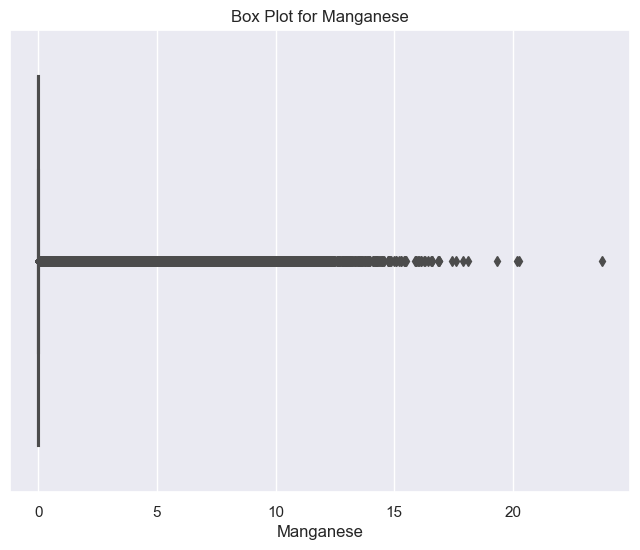

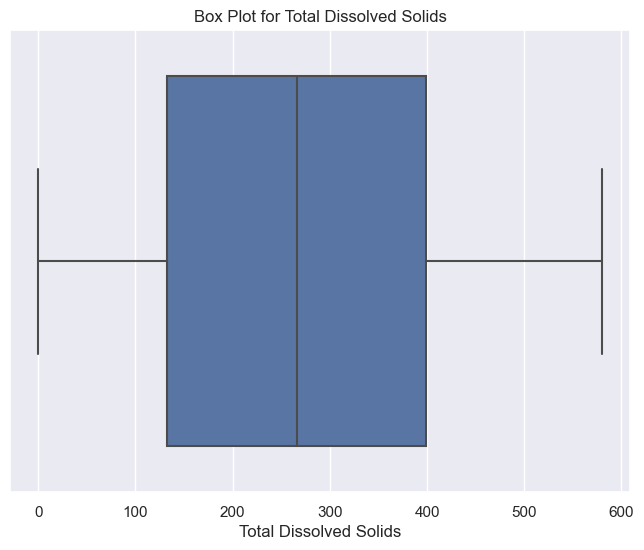

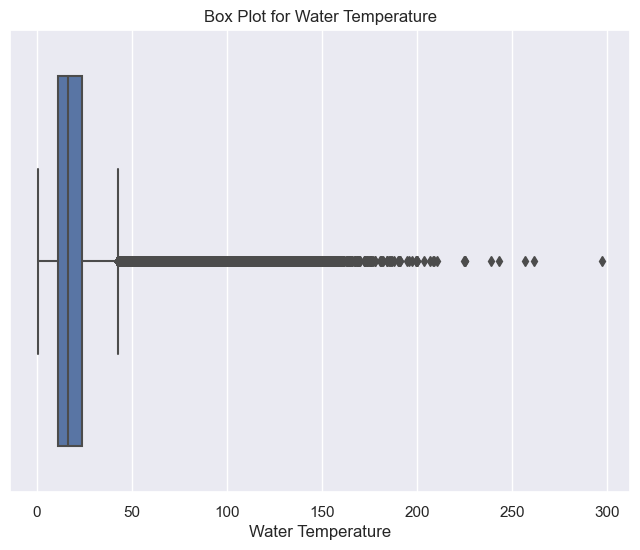

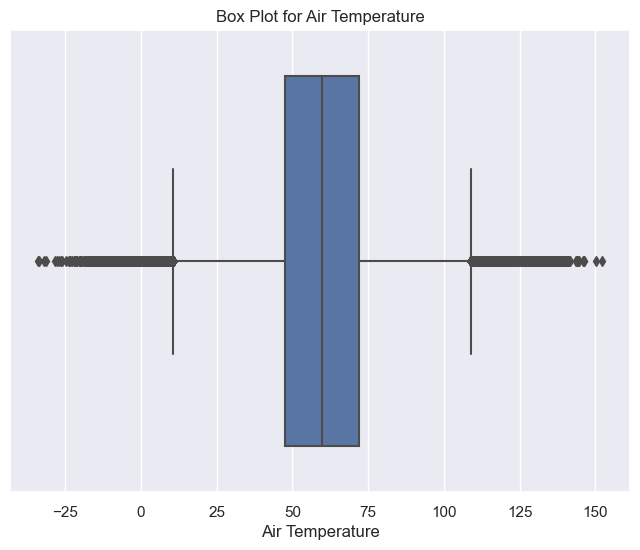

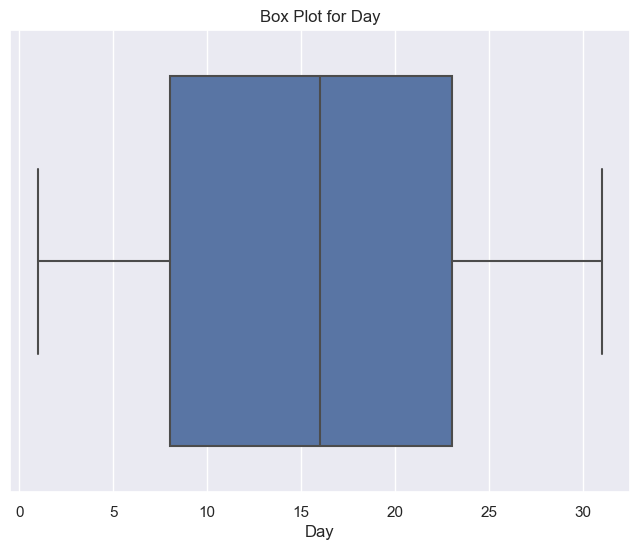

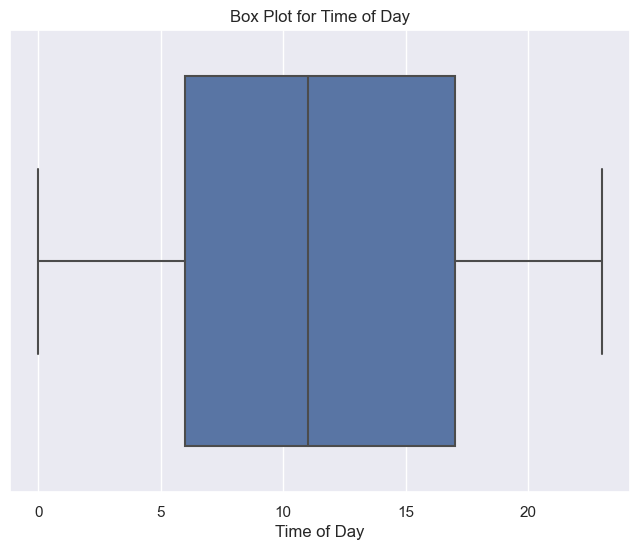

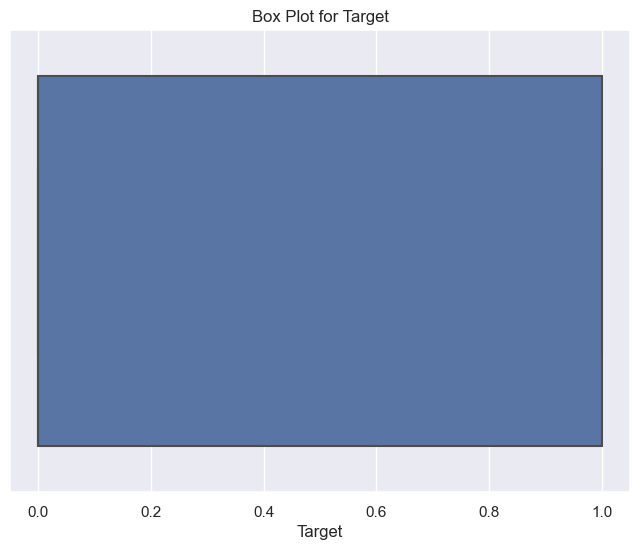

In [11]:
#finding the outliers of the data
for column in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_imputed[column])
    plt.title(f"Box Plot for {column}")
    plt.show()

In [12]:
#encoding the data
from sklearn.preprocessing import LabelEncoder

def encode_categorical_cols(df_imputed, cols):
    le = LabelEncoder()
    for col in cols:
        if col in df_imputed.columns:
            df_imputed[col] = le.fit_transform(df_imputed[col].astype(str))
    return df_imputed

# Assuming 'df_imputed' is the DataFrame with imputed values
categorical_cols = ['Source', 'Color', 'Month']  # Replace with the names of your categorical columns

df_encoded = encode_categorical_cols(df_imputed, categorical_cols)


In [13]:
df_encoded

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,6,1.369793,43.493324,4,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,1,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,2,15.348981,71.220586,9,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,2,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,4,11.643467,44.891330,4,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,3,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,1,10.092392,60.843233,0,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,2,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,5,15.249416,69.336671,6,29.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956837,5956837,8.418457,0.000095,8.427576,256.570863,4.751543e-26,4.967504,1,3.824532,0.541850,...,2.630130,9.608234e-03,545.990529,7,21.436974,70.493951,3,8.0,8.0,1
5956838,5956838,7.950573,0.215729,4.677850,292.727780,4.679421e-12,1.842063,3,1.181166,2.747241,...,3.555576,1.875424e-11,514.136530,1,19.064632,67.052475,11,8.0,6.0,1
5956839,5956839,8.145572,0.000005,7.112877,254.831175,3.150254e-56,0.656923,0,1.769609,1.398686,...,3.127251,1.199405e+00,336.947289,6,5.863636,64.086020,4,16.0,11.0,1
5956840,5956840,8.273548,0.001236,10.182408,122.842038,4.226073e-33,0.903032,2,0.366909,3.076229,...,2.762962,2.824411e+00,112.458644,6,28.034083,18.158372,7,29.0,13.0,1


In [14]:
df_encoded.to_csv("Water_Quality_Prediction.csv")

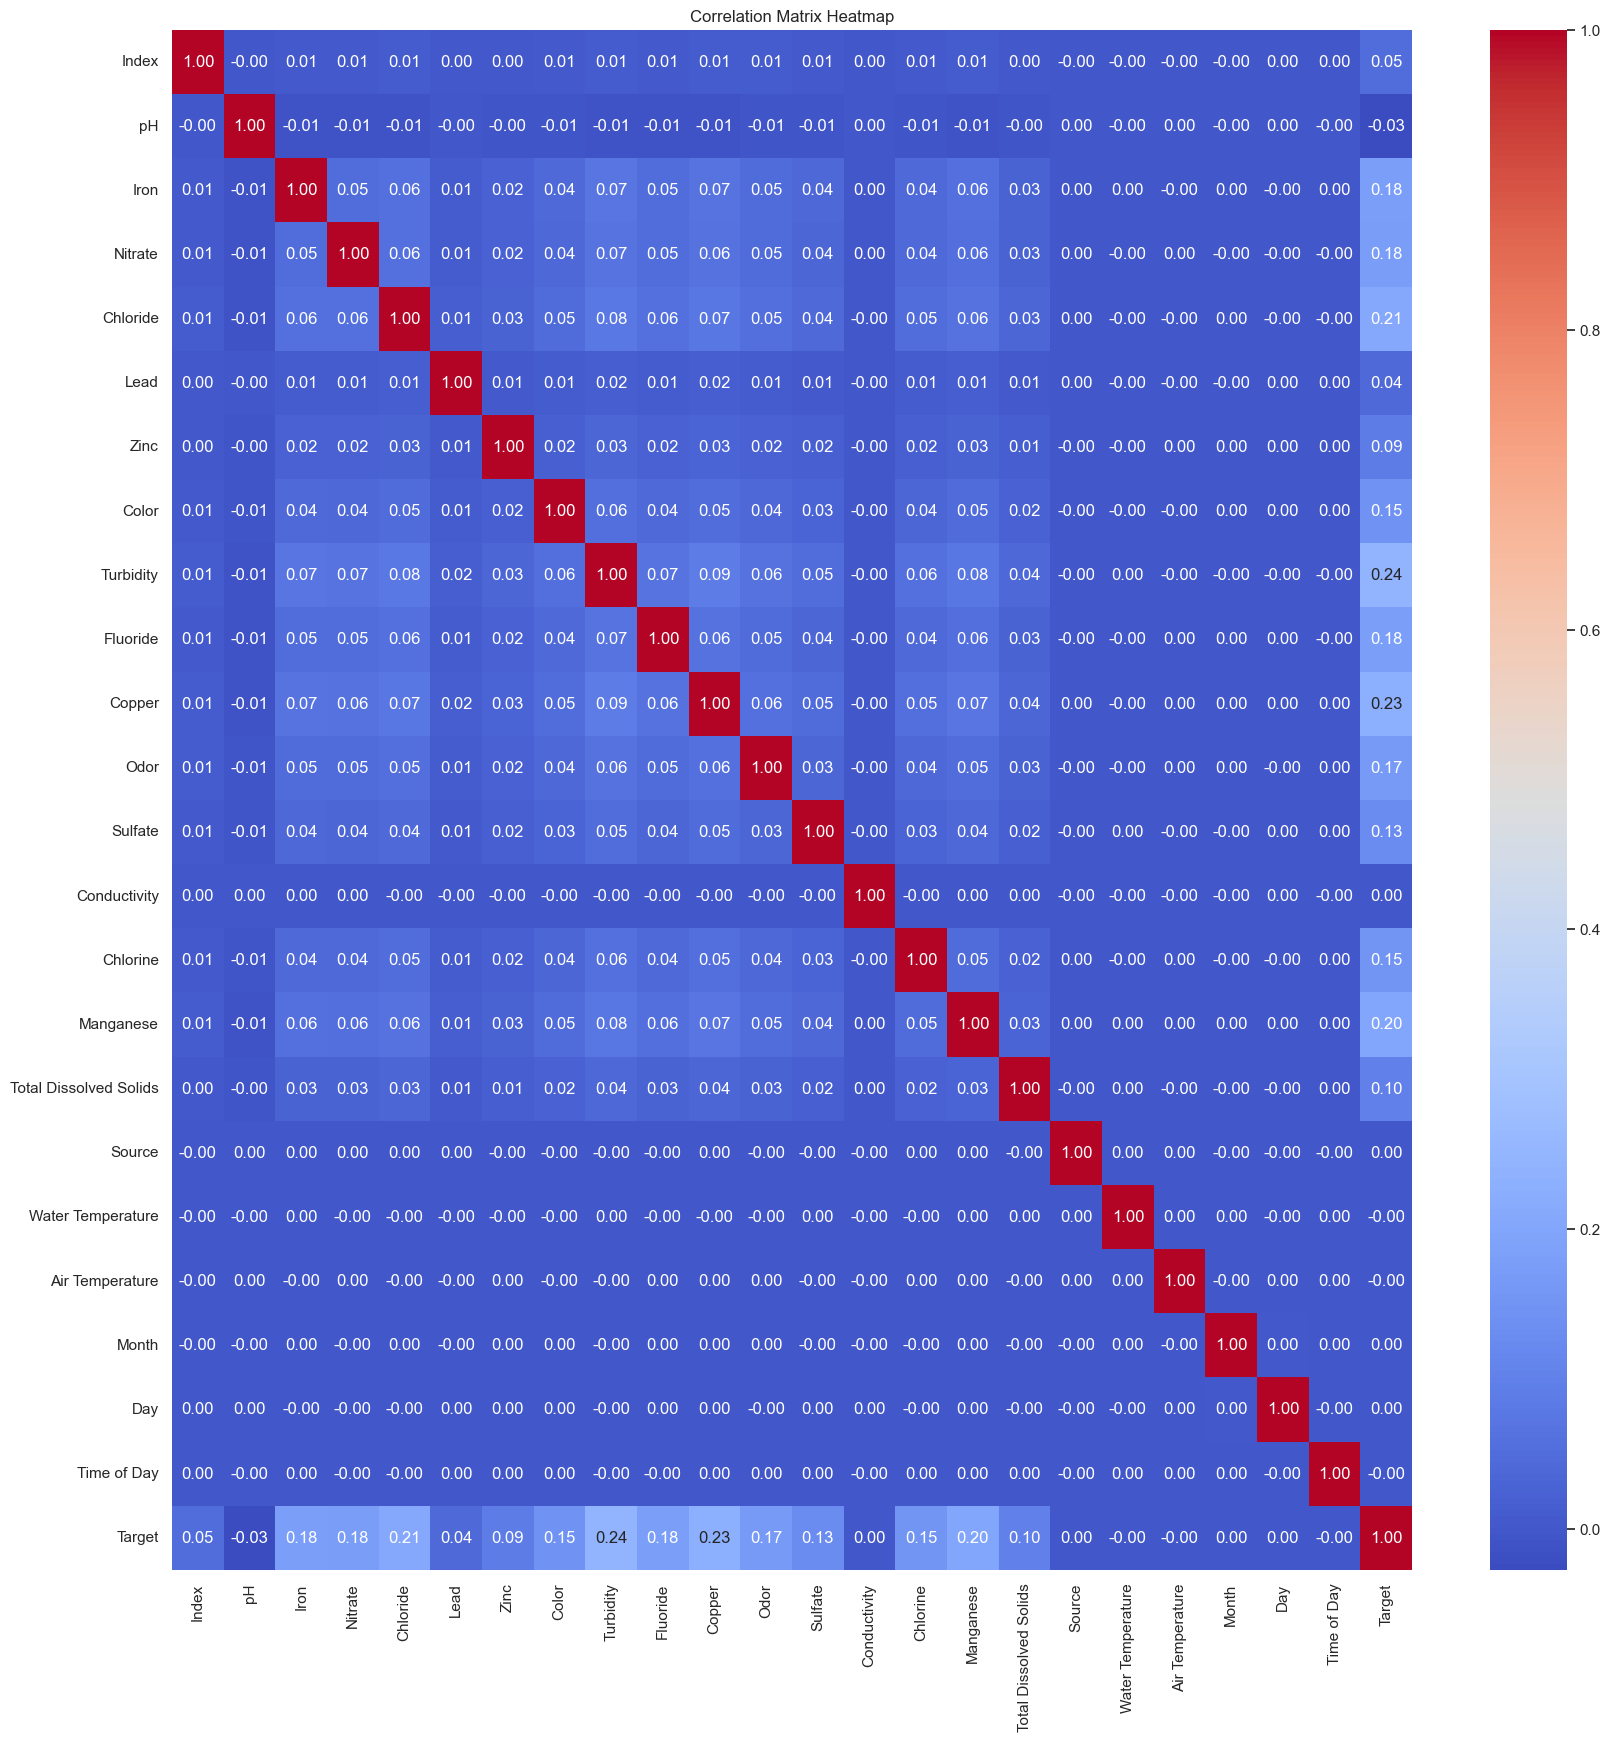

In [15]:
#Since the correlation value is very regulated there is no need to drop any column
correlation_matrix = df_imputed.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [16]:
#separate data into dependent and independent variables
x=df_imputed.drop(['Index','Target'], axis=1)
y=df_imputed['Target']

In [17]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


print(Counter(y))

Unable to create process using 'C:\Users\Saurabha Srivastava\anaconda3\python.exe "C:\Users\Saurabha Srivastava\anaconda3\Scripts\pip-script.py" install imbalanced-learn'


Counter({0: 4151590, 1: 1805252})


In [18]:
#balancing the masks

ros=RandomOverSampler()

x_ros,y_ros=ros.fit_resample(x,y)
print(Counter(y_ros))

#Scaling
scaler=MinMaxScaler((-1,1))   #you can set the range acc to your wish
x=scaler.fit_transform(x_ros)
y=y_ros

Counter({0: 4151590, 1: 4151590})


In [19]:
from sklearn.decomposition import PCA

pca=PCA(.95)
x_pca=pca.fit_transform(x)

print(x.shape)
print(x_pca.shape)  

(8303180, 22)
(8303180, 9)


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x_pca,y, test_size=0.2, random_state=42)

## NEURAL NETWORK MODEL

In [21]:
#NN
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [40]:

def model():
    classifier = Sequential()
    
    # Input layer
    classifier.add(Dense(64, input_shape=(x_train.shape[1],), activation='relu'))
    classifier.add(Dropout(0.2))
    
    # Additional hidden layers
    classifier.add(Dense(32, activation='relu'))
    classifier.add(Dropout(0.3))
    
    classifier.add(Dense(32, activation='relu'))
    classifier.add(Dropout(0.3))
    
    # Output layer
    classifier.add(Dense(1, activation='sigmoid'))
    
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return classifier


In [41]:
x_train.shape[1]# no of attributes

9

In [42]:
model=model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                640       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [43]:
# history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=50, verbose=1)

In [44]:
# model.save_weights('prediction.h5')

model.load_weights('prediction.h5')

## VISUALIZATION

In [45]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [46]:
    
def plot_auc(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob, pos_label=1)
    fig, c_ax = plt.subplots(1, 1, figsize=(9, 9))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.show()

def plot_precision_recall_curve_helper(y_true, y_pred_prob):
    plt.figure(figsize=(10, 6))
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob, pos_label=1)
    aps = average_precision_score(y_true, y_pred_prob)
    plt.plot(recall, precision, label='%s (AP Score:%0.2f)' % ('classification', aps))
    plt.legend()
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()


In [47]:
def plot_history(history):
    f=plt.figure()
    f.set_figwidth(15)
    

    # Plot model loss
    f.add_subplot(1,2,1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.legend()

    # Plot model accuracy
    f.add_subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.legend()

    plt.show()

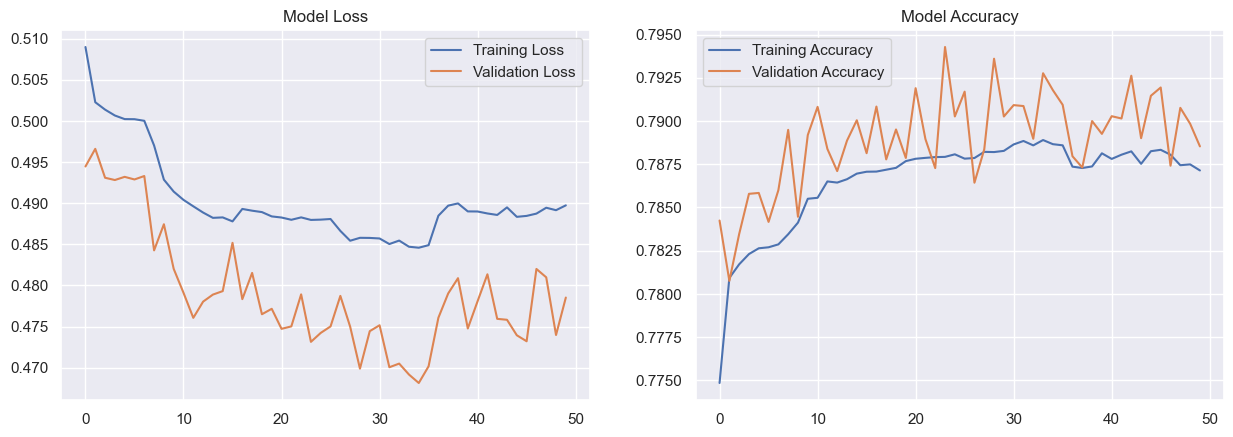

In [48]:
hist=plot_history(history)

51895/51895 [==============================] - 27s 521us/step


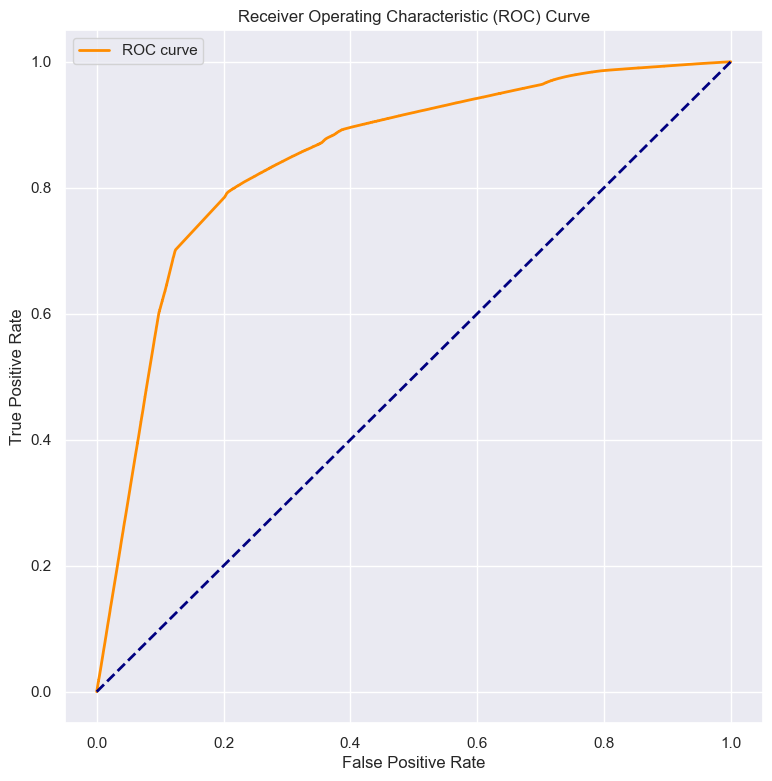

In [49]:
plot_auc(y_test, model.predict(x_test,verbose=True))

In [50]:
from sklearn.metrics import f1_score

# Calculate F1 score

def calc_f1(prec, recall):
    return 2 * (prec * recall) / (prec + recall) if recall and prec else 0

precision, recall, thresholds = precision_recall_curve(y_test, model.predict(x_test, verbose=True))
f1 = [calc_f1(precision[i], recall[i]) for i in range(len(thresholds))]
idx = np.argmax(f1)
threshold = thresholds[idx]

print("F1 Score:", f1[idx])
print("Precision:", precision[idx])
print("Recall:", recall[idx])
print("Threshold:", threshold)

51895/51895 [==============================] - 28s 533us/step
F1 Score: 0.7932672524858183
Precision: 0.7895393852826963
Recall: 0.7970304894781692
Threshold: 0.3571492


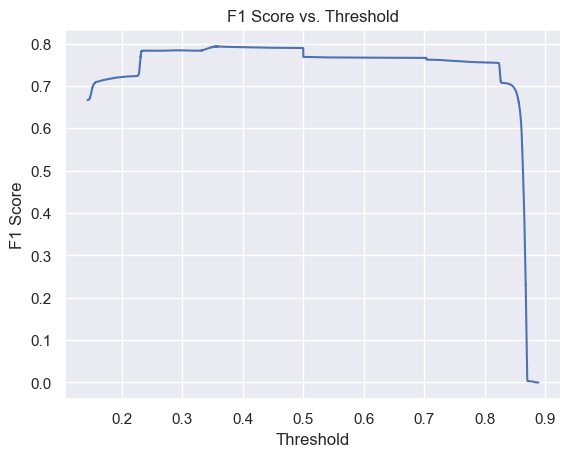

In [51]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(thresholds, f1)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.show()

#beyond 0.606 it starts to dec , coz threshold value is 0.606